In [1]:
# Let's import the libraries
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, Birch

In [2]:
# Our dataset
df = pd.read_csv('network_traffic_data.csv')

In [3]:
# We can then select the features
features = df[['Source IP1', 'Source IP2', 'Source IP3', 'Source IP4', 
               'Destination IP1', 'Destination IP2', 'Destination IP3', 'Destination IP4', 
               'Source Port', 'Destination Port', 'Protocol', 'Packet Size']]

In [4]:
# Normalize the features (we have done this several)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Here, let's define the model k-means model
kmeans = KMeans(n_clusters=3)

In [6]:
# Fit the model
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [7]:
# Get the cluster results for each data point
clusters = kmeans.predict(scaled_features)

In [8]:
# add the clusters
df['Cluster'] = clusters

In [9]:
# Actually, k-means is done.
# We can further apply PCA to compare

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_features)

In [10]:
# and the principal components to original dataframe

df['Principal Component 1'] = principalComponents[:, 0]
df['Principal Component 2'] = principalComponents[:, 1]
df['Principal Component 3'] = principalComponents[:, 2]

In [11]:
# We can save in a new file
df.to_csv('network_traffic_data_clustered.csv', index=False)

In [12]:
import matplotlib.pyplot as plt

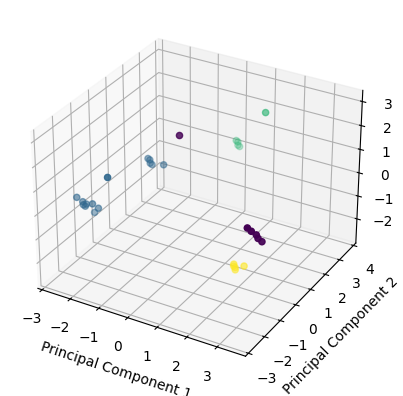

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Principal Component 1'], df['Principal Component 2'], df['Principal Component 3'], c=df['Cluster'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()